In [1]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt 
from numpy import ndarray
import random
import numpy as np

In [2]:
def experiment( device_num = 40):
    test_second = 60    
    hopping_rate = 1600 # 1600 hops per second
    hopping_times = test_second * hopping_rate
   
    device= [[0] * (hopping_times)] * device_num
    total_channel_index_collision = [0] * 80
    channel_index_collision = [0] * 80
    
    collision = [0]*9
    channel = [0] * 80
    # fetch remaping time slots
    s = np.random.normal(30, 5, 50)
    for i in range(50):
        if s[i] < 0:
            s[i] = 0
        s[i] = int(s[i])
    enable_remap_time = [0] * hopping_times
    for i in range(hopping_times):
        choose = random.randrange(0,50)
        if int(i+s[choose]) < hopping_times:
            enable_remap_time[int(i+s[choose])] = 1
        i += s[choose]
        
    threshold = [0.3,0.6]
    num_badchannel_list = [0] * 12
    num_badchannel_list_index = 0
    for thr in (threshold):
        print(thr)
        #init
        collision_num = 0
        for i in range(79) :
            channel_index_collision[i+1] = 0
            channel[i] = 0
            num_badchannel_list_index = 0
        record_badchannel= [0] * 80
        for i in range(0, hopping_times):
            for x in range(80):
                channel[x] = record_badchannel[x]
            for device_index in range(device_num) :
                # fetch channel
                fetch_channel = random.randrange(0,79)+1
                device[device_index][i] = fetch_channel
                # detect collision or bad channel
                if enable_remap_time[i] == 1:
                    if channel[fetch_channel-1] == 0:
                        device[device_index][i] = fetch_channel-1
                        fetch_channel = (fetch_channel-1)%80
                    elif channel[(fetch_channel+1) % 80] == 0:
                        device[device_index][i] = fetch_channel+1
                        fetch_channel = (fetch_channel+1)%80
                    else:
                        if channel[fetch_channel] !=2 : #collision
                            channel_index_collision[fetch_channel] += 1
                        collision_num = collision_num + 1
                        total_channel_index_collision[fetch_channel] += 1
                else:
                    if channel[fetch_channel] !=0 : 
                        if channel[fetch_channel] !=2 : #collision
                            channel_index_collision[fetch_channel] += 1    
                        collision_num = collision_num + 1
                        total_channel_index_collision[fetch_channel] += 1
                if channel[fetch_channel] == 0:
                    channel[fetch_channel] = 1
                elif channel[fetch_channel] == 1:
                    channel[fetch_channel] = 3
                elif channel[fetch_channel] == 2:
                    channel[fetch_channel] = 4
            for x in range(80):
                channel[x] = record_badchannel[x]
            #update badchannel
            p_channel_collision = [0]*80
            num_badchannel = 0
            if ( (i % (5*1600)) == 0 and i != 0):
                for x in range(79):
                    #print (channel_index_collision[x+1], " ", 5*1600)
                    p_channel_collision[x+1] = channel_index_collision[x+1] / (5*1600)
                    channel_index_collision[x+1] = 0
                    if p_channel_collision[x+1] > thr:
                        channel[x+1] = 2
                        num_badchannel += 1
                    record_badchannel[x+1] = channel[x+1]
                num_badchannel_list[num_badchannel_list_index] = num_badchannel
                num_badchannel_list_index += 1
        for x in range(79):
            p_channel_collision[x+1] = channel_index_collision[x+1] / (5*1600)
            channel_index_collision[x+1] = 0
            if p_channel_collision[x+1] > thr:
                channel[x+1] = 2
                num_badchannel += 1
            record_badchannel[x+1] = channel[x+1]
        num_badchannel_list[num_badchannel_list_index] = num_badchannel
        num_badchannel_list_index += 1
        #plot graph~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        print("plot graph")
        %matplotlib inline
        import seaborn as sns
        import pandas as pd
        import matplotlib.pyplot as plt
        time = [ 5 , 10 , 15 , 20 , 25 , 30 , 35 , 40 , 45 , 50 , 55 , 60]
        print (num_badchannel_list)
        pt = pd.DataFrame(
            {"time": time,
             "number 0f bad channel": num_badchannel_list
            }
        )
        sns.factorplot(data = pt, x="time", y="number 0f bad channel", ci = None, size=10 ,kind="bar",aspect=2)
        plt.show()


0.3
plot graph
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


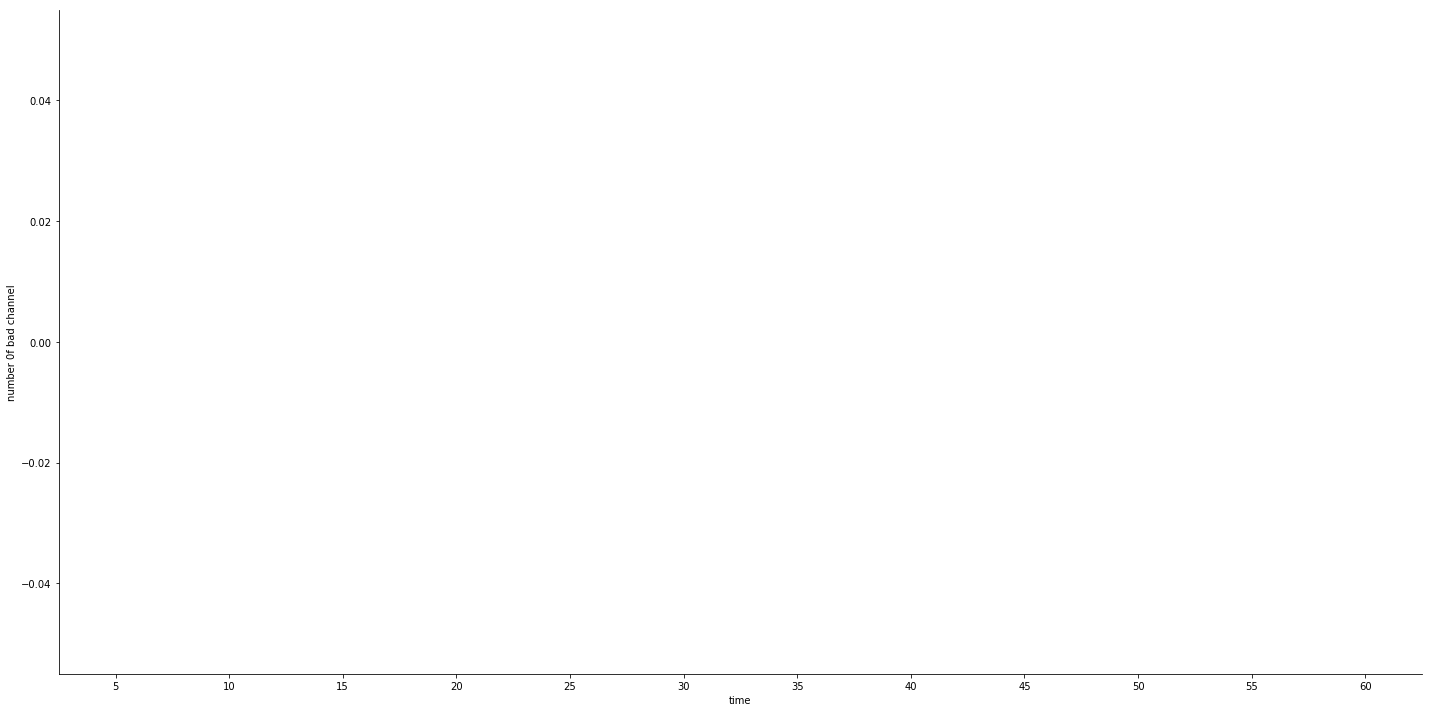

0.6
plot graph
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


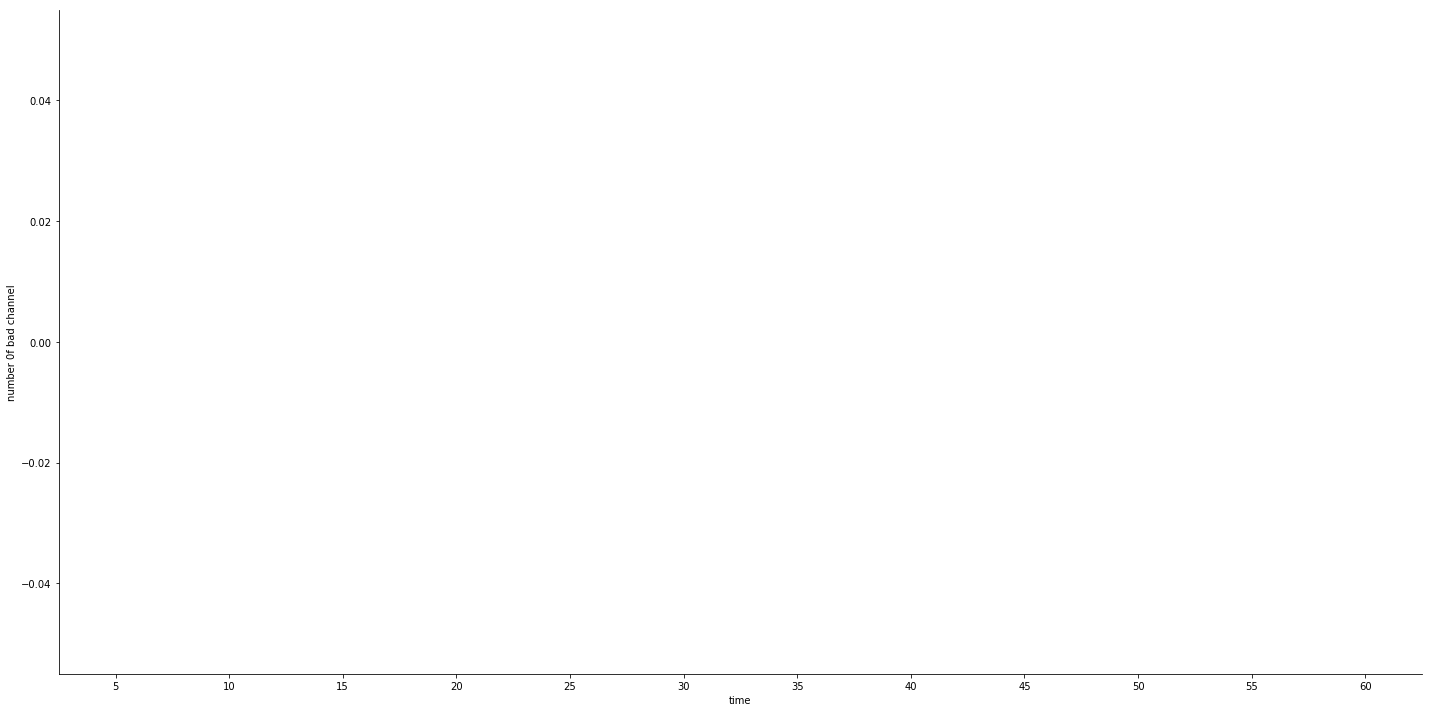

In [3]:
experiment( device_num = 40)

0.3
plot graph
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


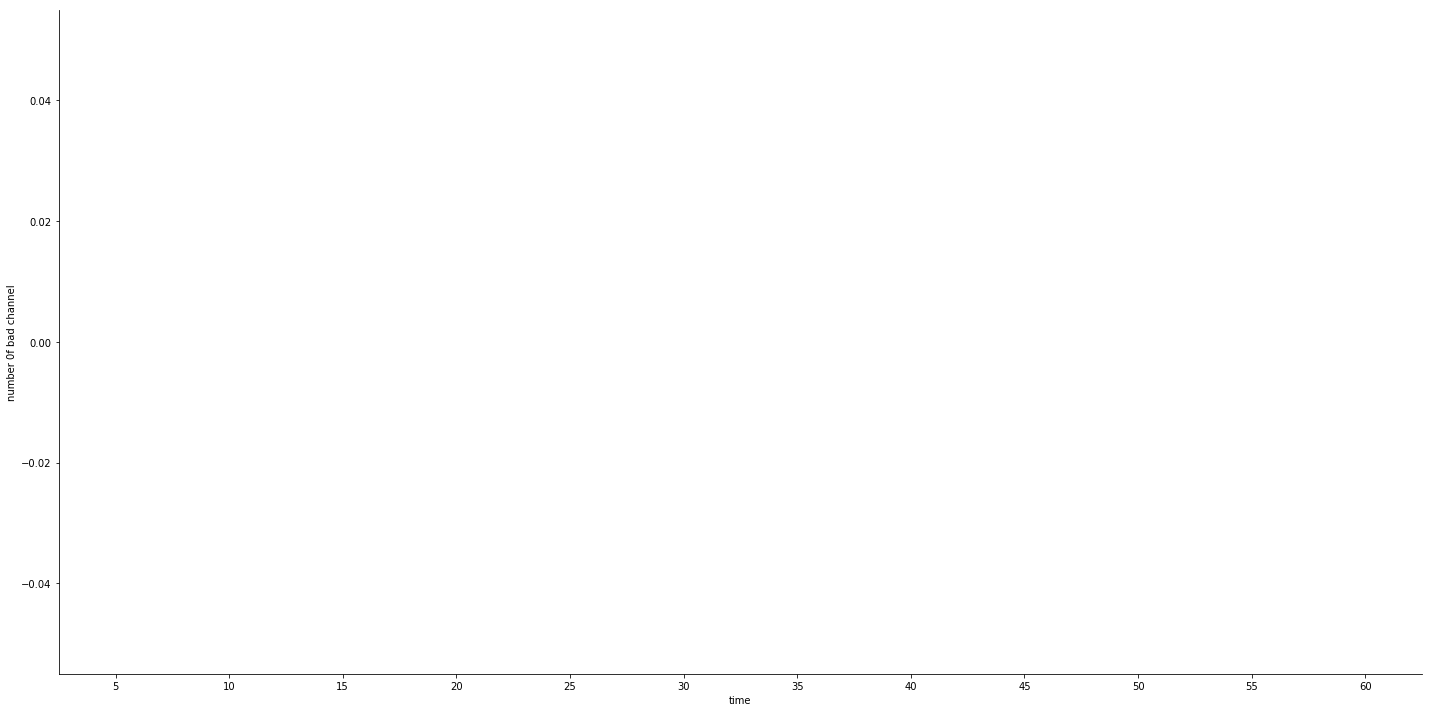

0.6
plot graph
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


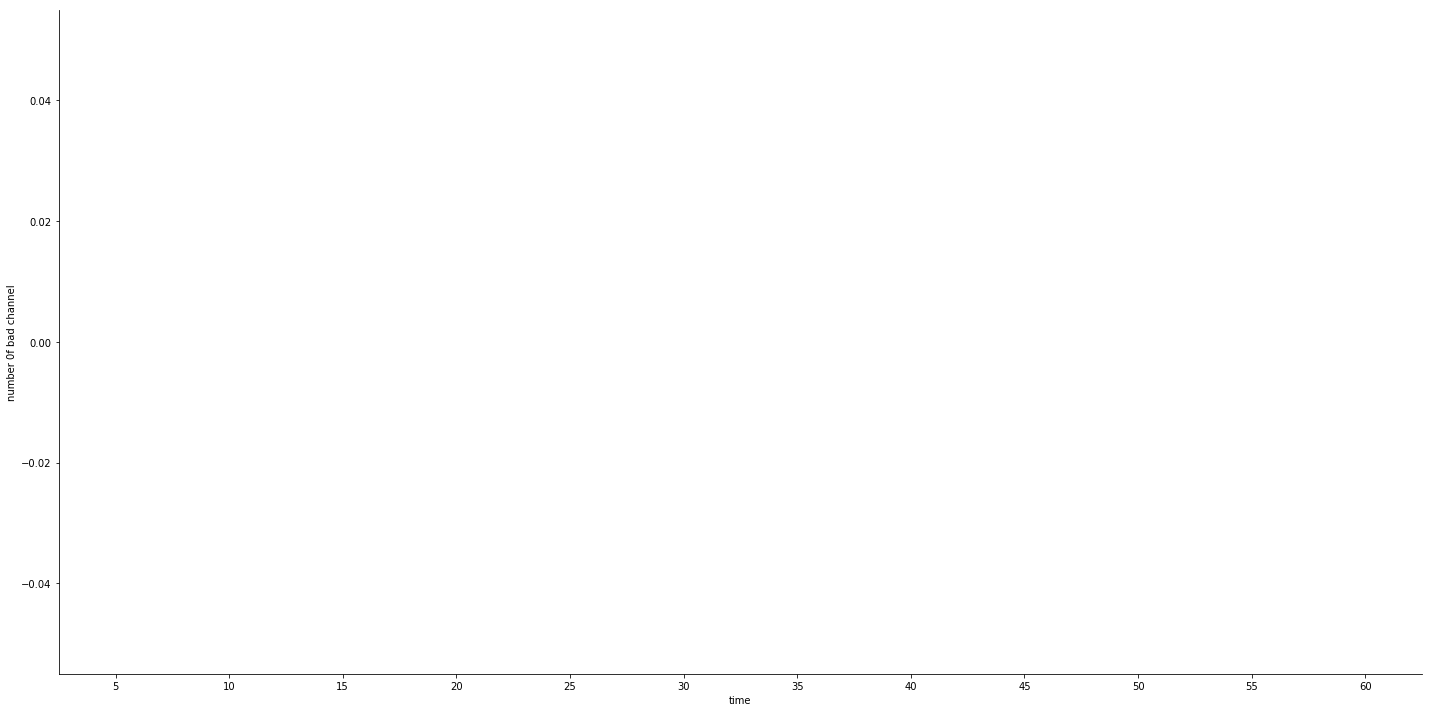

In [4]:
experiment( device_num = 50)

0.3
plot graph
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


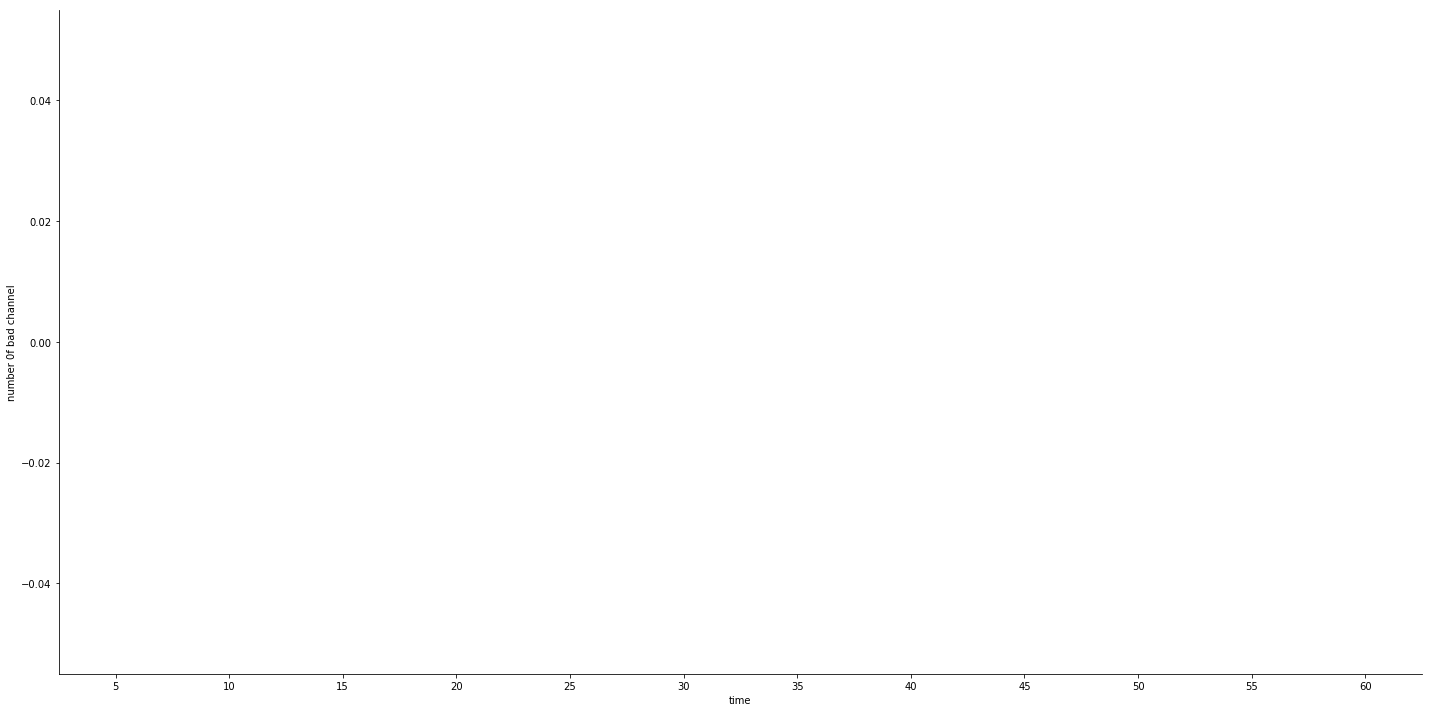

0.6
plot graph
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


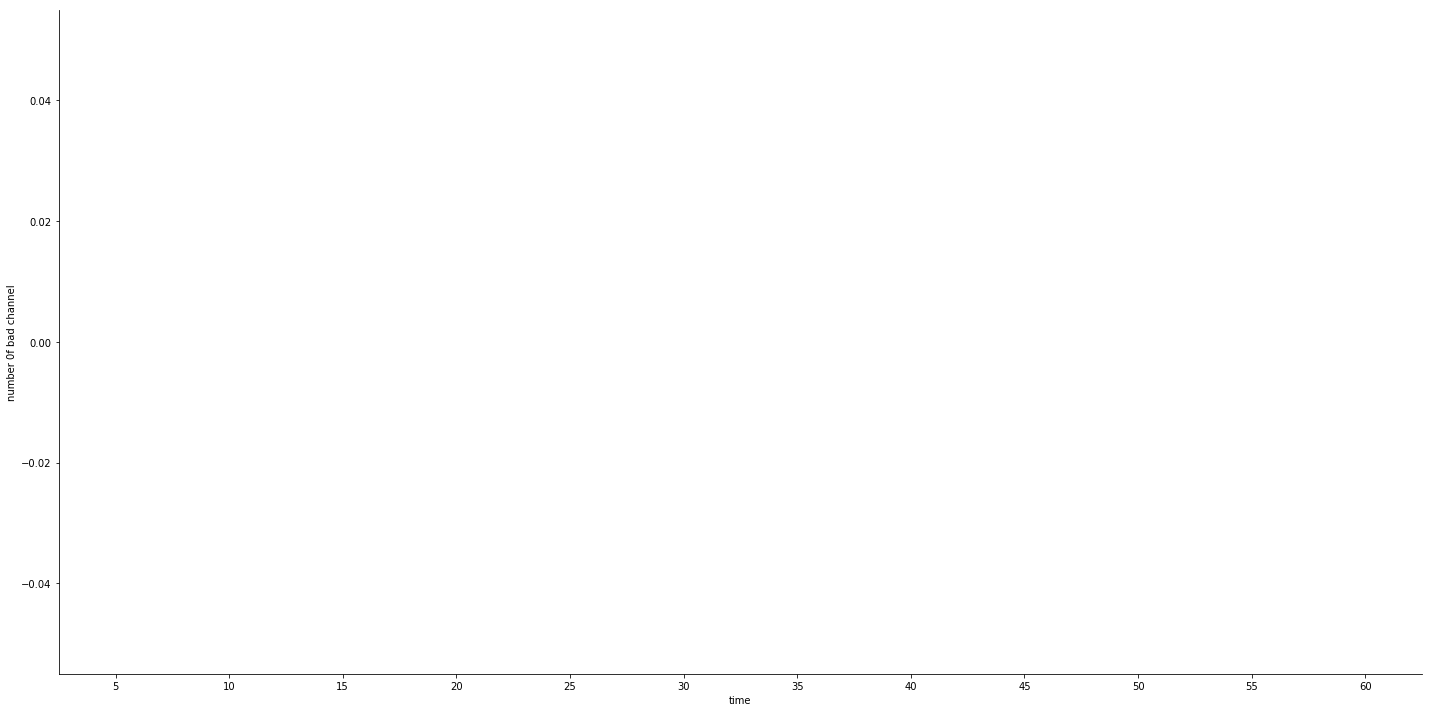

In [5]:
experiment( device_num = 60)